# Neural Networks with Keras: Minimal Example

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Lecture 3, Tutorials

See https://machine-learning-for-physicists.org and the current course website linked there!

This notebook shows how to:
- implement and train a simple neural network using keras

The networks has 1 input and 1 output neuron, and can be used to fit a 1D function!

(see the visualization notebook for lecture 3 to get more advanced functionality. This here is kept as simple as possible!)

### Imports: numpy and matplotlib and keras

In [1]:
# keras:
from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras.layers import Dense # Dense is the standard network layer

# array math:
import numpy as np

# plotting:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

In [8]:
# Define network:
Net=Sequential() # creating a neural network!
Net.add(Dense(20,input_shape=(1,),activation="sigmoid")) # first hidden layer: 20 neurons (and 1 input neuron!)
Net.add(Dense(10,activation="sigmoid")) # second hidden layer: 10 neurons
Net.add(Dense(1,activation="linear")) # output layer: 1 neuron

# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='mse',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent

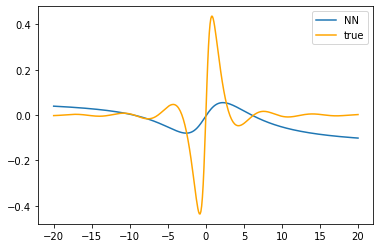

In [9]:
# run this cell multiple times to train the network better and better!

# a simple 1D function:
def my_target(y):
    return( np.sin(y)/(1+y**2) ) # a wave packet...

# training on a simple 1D function:

training_batches=1000 # number of training batches
batchsize=20 # samples per batch
costs=np.zeros(training_batches) # array for storing costs

# run through all training batches:
for j in range(training_batches):
    y_in=np.random.uniform(low=-10.0,high=+10.0,size=[batchsize,1]) # get randomly scattered points (uniform distribution)
    y_target=my_target(y_in) # produce correct outputs (our target)
    costs[j]=Net.train_on_batch(y_in,y_target) # train on this batch of samples
    print(str(costs[j]),end="   \r") # print current cost function, overwrite line always
    
# now plot the output:

# get the output on a 1D grid of points:
N=400 # number of points
y_in=np.zeros([N,1]) # prepare correct shape for network, here N becomes the batch size
y_in[:,0]=np.linspace(-20.0,20.0,N) # fill with interval
y_out=Net.predict_on_batch(y_in) # apply the network to this set of points!

# plot it!
plt.plot(y_in,y_out,label="NN")
plt.plot(y_in,my_target(y_in),color="orange",label="true")
plt.legend()
plt.show()

# Tutorials: Exercises

## Exercise 1: explore how the network structure and activations help to get a better fit!

Vary the number of layers, the neurons per layer, and the activation functions!

Keep the number of training batches and the batch size the same for each case!

## Exercise 2: explore different target functions

Understand which functions present difficulties for the neural network!